___
# Ciência dos Dados - PROJETO 1

_Bruno Arruda Camargo Paulino Costa_

## Progresso do Acesso à TV


___
## Introdução

Esta análise tem o objetivo de avaliar os dados do PNAD no período de 2013-2015 das regiões Nordeste e Sudeste à respeito ao acceso a TV destes. Portanto as perguntas a serem respondidas por esse trabalho são: **Qual região e área tem o maior potencial para aumentar o acesso a TV?**


___
## Imports

In [734]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [735]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\brune\OneDrive\Documentos\PythonScripts


___
## Análise 2013

Serão filtrados os dados relevantes como: os diversos tipos de acesso a TV, região, área urbana ou rural, renda e números de
residentes.

In [736]:
dados2013=pd.read_csv('DOM2013.csv',sep=',')

dados2013.loc[(dados2013.UF<30),"Regiao"] = "Nordeste"
dados2013.loc[(dados2013.UF>=31),"Regiao"] = "Sudeste"

dados2013.loc[(dados2013.V4105<4),"Area"] = "Urbana"
dados2013.loc[(dados2013.V4105>=4),"Area"] = "Rural"

dados2013.V0226 = dados2013.V0226.astype('category')
dados2013.V02272 = dados2013.V02272.astype('category')
dados2013.V02273 = dados2013.V02273.astype('category')
dados2013.V02274 = dados2013.V02274.astype('category')
dados2013.Area = dados2013.Area.astype('category')
dados2013.Regiao = dados2013.Regiao.astype('category')
dados2013.V4620 = dados2013.V4620.astype('object')
dados2013.V4614 = dados2013.V4614.astype('object')

dados2013.V0226.cat.categories = (["Sim", "Não"])
dados2013.V02272.cat.categories = (["Sim", "Não"])
dados2013.V02273.cat.categories = (["Sim", "Não","Não Sabe"])
dados2013.V02274.cat.categories = (["Sim", "Não","Não Sabe"])

dados2013 = dados2013[pd.notnull(dados2013["V0226"])]
dados2013 = dados2013[dados2013.V4614<999999999]

wt1 = dados2013.Regiao.value_counts(sort=False) #Regiao
wt2 = dados2013.Area.value_counts(sort=False) #Area
wt4 = dados2013.V0226.value_counts(sort=False) #TV Cor
wt5 = dados2013.V02272.value_counts(sort=False) #TV Assinada
wt6 = dados2013.V02273.value_counts(sort=False) #TV Digital
wt7 = dados2013.V02274.value_counts(sort=False) #TV Parabólica

dados2013.rename(columns={"V0101":"Ano","V0226":"TVCor","V02272":"TVAssinada","V02273":"TVDigital","V02274":"TVParabólica","V4620":"Residentes","V4614":"Renda","Area":"Área","Regiao":"Região"}, inplace=True)

pd.DataFrame(dados2013.loc[21219:108605,["Ano","Região","TVCor","TVAssinada","TVDigital","TVParabólica","Área","Residentes","Renda"]])


,Ano,Região,TVCor,TVAssinada,TVDigital,TVParabólica,Área,Residentes,Renda
21219,2013,Nordeste,Sim,Não,Não Sabe,Sim,Urbana,3,4602
21220,2013,Nordeste,Sim,Não,Não,Sim,Urbana,4,1019
21221,2013,Nordeste,Sim,Não,Não,Sim,Urbana,3,1356
21223,2013,Nordeste,Sim,Não,Não,Sim,Urbana,9,2168
21224,2013,Nordeste,Sim,Não,Não,Sim,Urbana,4,632
21225,2013,Nordeste,Não,NaN,NaN,NaN,Urbana,5,2586
21229,2013,Nordeste,Sim,Não,Não,Sim,Urbana,3,230
21230,2013,Nordeste,Sim,Não,Não,Não,Urbana,6,1428
21231,2013,Nordeste,Sim,Não,Não,Não,Urbana,2,1356
21232,2013,Nordeste,Sim,Não,Não,Não,Urbana,3,678


___
## Análise 2014

In [737]:
dados2014=pd.read_csv('DOM2014.csv',sep=',')

dados2014.loc[(dados2014.UF<30),"Regiao"] = "Nordeste"
dados2014.loc[(dados2014.UF>=31),"Regiao"] = "Sudeste"

dados2014.loc[(dados2014.V4105<4),"Area"] = "Urbana"
dados2014.loc[(dados2014.V4105>=4),"Area"] = "Rural"

dados2014.V0226 = dados2014.V0226.astype('category')
dados2014.V02272 = dados2014.V02272.astype('category')
dados2014.V02273 = dados2014.V02273.astype('category')
dados2014.V02274 = dados2014.V02274.astype('category')
dados2014.Area = dados2014.Area.astype('category')
dados2014.Regiao = dados2014.Regiao.astype('category')
dados2014.V4620 = dados2014.V4620.astype('object')
dados2014.V4614 = dados2014.V4614.astype('object')

dados2014.V0226.cat.categories = (["Sim", "Não"])
dados2014.V02272.cat.categories = (["Sim", "Não"])
dados2014.V02273.cat.categories = (["Sim", "Não","Não Sabe"])
dados2014.V02274.cat.categories = (["Sim", "Não","Não Sabe"])

dados2014 = dados2014[pd.notnull(dados2014["V0226"])]
dados2014 = dados2014[dados2014.V4614<999999999]

vt1 = dados2014.Regiao.value_counts(sort=False) #Regiao
vt2 = dados2014.Area.value_counts(sort=False) #Area
vt4 = dados2014.V0226.value_counts(sort=False) #TV Cor
vt5 = dados2014.V02272.value_counts(sort=False) #TV Assinada
vt6 = dados2014.V02273.value_counts(sort=False) #TV Digital
vt7 = dados2014.V02274.value_counts(sort=False) #TV Parabólica

dados2014.rename(columns={"V0101":"Ano","V0226":"TVCor","V02272":"TVAssinada","V02273":"TVDigital","V02274":"TVParabólica","V4620":"Residentes","V4614":"Renda","Area":"Área","Regiao":"Região"}, inplace=True)

pd.DataFrame(dados2014.loc[21431:110539,["Ano","Região","TVCor","TVAssinada","TVDigital","TVParabólica","Área","Residentes","Renda"]])


,Ano,Região,TVCor,TVAssinada,TVDigital,TVParabólica,Área,Residentes,Renda
21431,2014,Nordeste,Sim,Não,Sim,Sim,Urbana,3,2500
21432,2014,Nordeste,Sim,Não,Não,Sim,Urbana,3,1500
21434,2014,Nordeste,Sim,Não,Não,Sim,Urbana,3,724
21435,2014,Nordeste,Sim,Não,Não,Sim,Urbana,3,2500
21436,2014,Nordeste,Sim,Não,Não,Sim,Urbana,2,2450
21437,2014,Nordeste,Sim,Não,Não,Sim,Urbana,6,1843
21438,2014,Nordeste,Sim,Não,Não,Sim,Urbana,7,871
21439,2014,Nordeste,Sim,Não,Não,Sim,Urbana,2,477
21440,2014,Nordeste,Sim,Não,Sim,Sim,Urbana,4,747
21441,2014,Nordeste,Sim,Não,Não,Sim,Urbana,4,876


___
## Análise 2015

In [738]:
dados2015=pd.read_csv('DOM2015.csv',sep=',')

dados2015.loc[(dados2015.UF<30),"Regiao"] = "Nordeste"
dados2015.loc[(dados2015.UF>=31),"Regiao"] = "Sudeste"

dados2015.loc[(dados2015.V4105<4),"Area"] = "Urbana"
dados2015.loc[(dados2015.V4105>=4),"Area"] = "Rural"

dados2015.V0226 = dados2015.V0226.astype('category')
dados2015.V02272 = dados2015.V02272.astype('category')
dados2015.V02273 = dados2015.V02273.astype('category')
dados2015.V02274 = dados2015.V02274.astype('category')
dados2015.Area = dados2015.Area.astype('category')
dados2015.Regiao = dados2015.Regiao.astype('category')
dados2015.V4620 = dados2015.V4620.astype('object')
dados2015.V4614 = dados2015.V4614.astype('object')

dados2015.V0226.cat.categories = (["Sim", "Não"])
dados2015.V02272.cat.categories = (["Sim", "Não"])
dados2015.V02273.cat.categories = (["Sim", "Não","Não Sabe"])
dados2015.V02274.cat.categories = (["Sim", "Não","Não Sabe"])

dados2015 = dados2015[pd.notnull(dados2015["V0226"])]
dados2015 = dados2015[dados2015.V4614<999999999]

ut1 = dados2015.Regiao.value_counts(sort=False) #Regiao
ut2 = dados2015.Area.value_counts(sort=False) #Area
ut4 = dados2015.V0226.value_counts(sort=False) #TV Cor
ut5 = dados2015.V02272.value_counts(sort=False) #TV Assinada
ut6 = dados2015.V02273.value_counts(sort=False) #TV Digital
ut7 = dados2015.V02274.value_counts(sort=False) #TV Parabólica

dados2015.rename(columns={"V0101":"Ano","V0226":"TVCor","V02272":"TVAssinada","V02273":"TVDigital","V02274":"TVParabólica","V4620":"Residentes","V4614":"Renda","Area":"Área","Regiao":"Região"}, inplace=True)

pd.DataFrame(dados2015.loc[21442:110421,["Ano","Região","TVCor","TVAssinada","TVDigital","TVParabólica","Área","Residentes","Renda"]])

,Ano,Região,TVCor,TVAssinada,TVDigital,TVParabólica,Área,Residentes,Renda
21442,2015,Nordeste,Sim,Não,Não,Não,Urbana,1,1576
21443,2015,Nordeste,Sim,Não,Não,Sim,Urbana,2,788
21444,2015,Nordeste,Sim,Não,Não,Sim,Urbana,5,2182
21447,2015,Nordeste,Sim,Não,Não,Sim,Urbana,12,755
21448,2015,Nordeste,Sim,Não,Não,Sim,Urbana,7,1313
21449,2015,Nordeste,Sim,Não,Não Sabe,Sim,Urbana,3,732
21450,2015,Nordeste,Sim,Não,Não,Sim,Urbana,3,455
21451,2015,Nordeste,Sim,Não,Não,Sim,Urbana,1,1900
21452,2015,Nordeste,Sim,Sim,Não,Não,Urbana,2,4590
21454,2015,Nordeste,Sim,Não,Não,Sim,Urbana,4,1678



A partir dos dados desses 3 anos filtrados, serão gerados gráficos relevantes a pergunta, além de uma análise inicial destes.

___
## Gráficos 2013

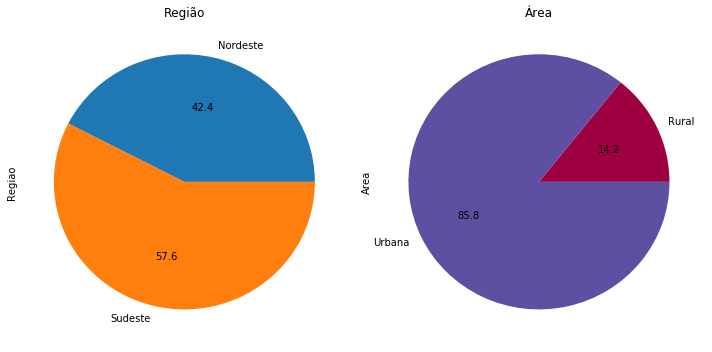

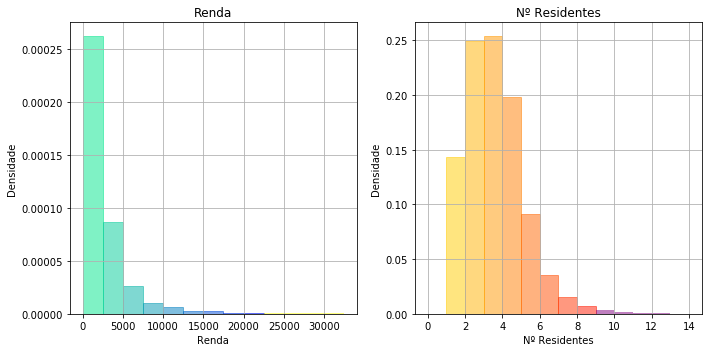

In [739]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = wt1.plot(kind='pie',title='Região',autopct='%.1f')

plt.subplot(122)
plot = wt2.plot(kind='pie',title='Área',autopct='%.1f',colormap="Spectral")

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
faixa=np.arange(0,35000,2500)
plot = dados2013.Renda.plot.hist(bins=faixa,title='Renda', normed=1, alpha=0.5,color="yellow",sharex=True, sharey=True)
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.grid()

cm = plt.cm.get_cmap('winter_r')
cmz=np.arange(0,1,0.1)
for c,z in zip(faixa,cmz):
    min_distance = float("inf")  # initialize min_distance with infinity
    index_of_bar_to_label = 0
    bar_value_to_label = c
    for i, rectangle in enumerate(plot.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    plot.patches[index_of_bar_to_label].set_color(cm(z))

plt.subplot(122)
faixa1=np.arange(0,15,1)
plot = dados2013.Residentes.plot.hist(bins=faixa1,title='Nº Residentes', normed=1, alpha=0.5,color="purple")
plt.ylabel('Densidade')
plt.xlabel('Nº Residentes')
plt.grid()

cm = plt.cm.get_cmap('autumn_r')
cmz=np.arange(0,1,0.1)
for c,z in zip(faixa1,cmz):
    min_distance = float("inf")  # initialize min_distance with infinity
    index_of_bar_to_label = 0
    bar_value_to_label = c
    for i, rectangle in enumerate(plot.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    plot.patches[index_of_bar_to_label].set_color(cm(z))

plt.tight_layout()
plt.show()


___
## Gráficos 2014

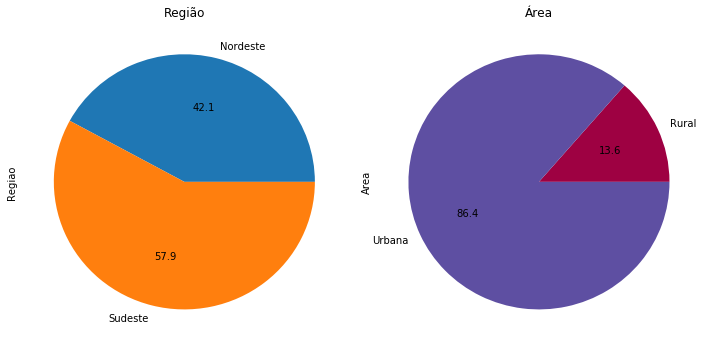

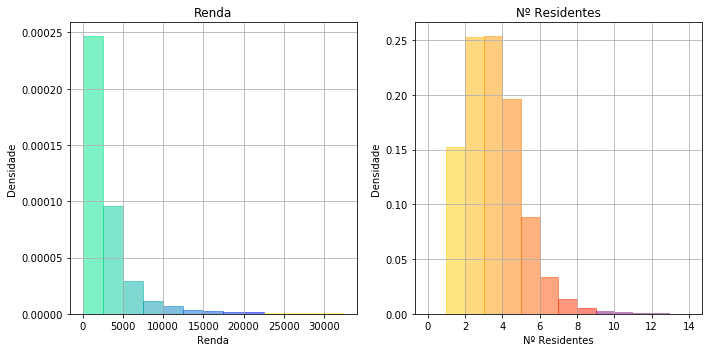

In [740]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = vt1.plot(kind='pie',title='Região',autopct='%.1f')

plt.subplot(122)
plot = vt2.plot(kind='pie',title='Área',autopct='%.1f',colormap="Spectral")

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
faixa=np.arange(0,35000,2500)
plot = dados2014.Renda.plot.hist(bins=faixa,title='Renda', normed=1, alpha=0.5,color="yellow")
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.grid()

cm = plt.cm.get_cmap('winter_r')
cmz=np.arange(0,1,0.1)
for c,z in zip(faixa,cmz):
    min_distance = float("inf")  # initialize min_distance with infinity
    index_of_bar_to_label = 0
    bar_value_to_label = c
    for i, rectangle in enumerate(plot.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    plot.patches[index_of_bar_to_label].set_color(cm(z))

plt.subplot(122)
faixa1=np.arange(0,15,1)
plot = dados2014.Residentes.plot.hist(bins=faixa1,title='Nº Residentes', normed=1, alpha=0.5,color="purple")
plt.ylabel('Densidade')
plt.xlabel('Nº Residentes')
plt.grid()

cm = plt.cm.get_cmap('autumn_r')
cmz=np.arange(0,1,0.1)
for c,z in zip(faixa1,cmz):
    min_distance = float("inf")  # initialize min_distance with infinity
    index_of_bar_to_label = 0
    bar_value_to_label = c
    for i, rectangle in enumerate(plot.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    plot.patches[index_of_bar_to_label].set_color(cm(z))

plt.tight_layout()
plt.show()

___
## Gráficos 2015

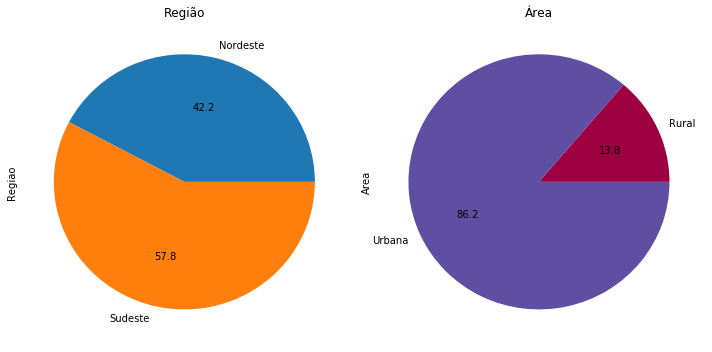

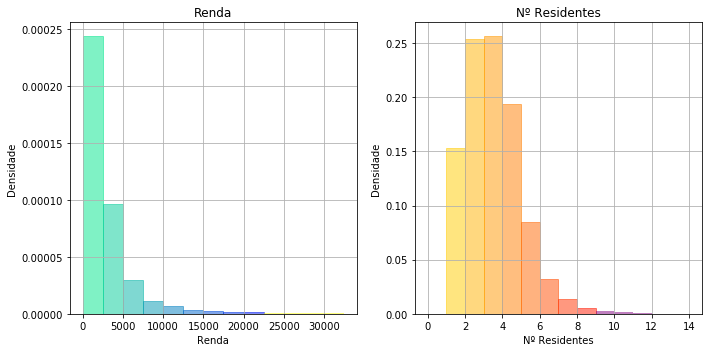

In [741]:
fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
plot = ut1.plot(kind='pie',title='Região',autopct='%.1f')

plt.subplot(122)
plot = ut2.plot(kind='pie',title='Área',autopct='%.1f',colormap="Spectral")

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 5))
plt.subplot(121)
faixa=np.arange(0,35000,2500)
plot = dados2015.Renda.plot.hist(bins=faixa,title='Renda', normed=1, alpha=0.5,color="yellow")
plt.ylabel('Densidade')
plt.xlabel('Renda')
plt.grid()

cm = plt.cm.get_cmap('winter_r')
cmz=np.arange(0,1,0.1)
for c,z in zip(faixa,cmz):
    min_distance = float("inf")  # initialize min_distance with infinity
    index_of_bar_to_label = 0
    bar_value_to_label = c
    for i, rectangle in enumerate(plot.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    plot.patches[index_of_bar_to_label].set_color(cm(z))

plt.subplot(122)
faixa1=np.arange(0,15,1)
plot = dados2015.Residentes.plot.hist(bins=faixa1,title='Nº Residentes', normed=1, alpha=0.5,color="purple")
plt.ylabel('Densidade')
plt.xlabel('Nº Residentes')
plt.grid()

cm = plt.cm.get_cmap('autumn_r')
cmz=np.arange(0,1,0.1)
for c,z in zip(faixa1,cmz):
    min_distance = float("inf")  # initialize min_distance with infinity
    index_of_bar_to_label = 0
    bar_value_to_label = c
    for i, rectangle in enumerate(plot.patches):  # iterate over every bar
        tmp = abs(  # tmp = distance from middle of the bar to bar_value_to_label
            (rectangle.get_x() +
                (rectangle.get_width() * (1 / 2))) - bar_value_to_label)
        if tmp < min_distance:  # we are searching for the bar with x cordinate
                                # closest to bar_value_to_label
            min_distance = tmp
            index_of_bar_to_label = i
    plot.patches[index_of_bar_to_label].set_color(cm(z))

plt.tight_layout()
plt.show()

Esses gráficos foram feitos para situar a pesquisa e dar uma noção da distribuição de domicílios e da renda mensal desses locais.

Percebe-se que a região Sudeste possui uma quantidade maior de domicílios; a área urbana das duas regiões é muito maior que a área rural; a renda está em média em R$1250,00 e as residências têm em média 2-4 indivíduos.

___
## Cruzando Dados 2013

Após analisar os dados iniciais, foi feito um cruzamento de dados, separando as numerosas váriaveis qualitativas de acordo com sua região e área, assim facilitando a visualização das mudanças ao longo dos três anos nessa determinada região/área. Também foram gerados gráficos que melhor representam as alterações temporais.

In [742]:
yt=pd.crosstab(dados2013.Região, dados2013.Área, margins=True, rownames=['Região'], colnames=['Área'], normalize="index")*100
yt=yt.round(decimals=1)
#yt

In [743]:
yt1=pd.crosstab(dados2013.Região, dados2013.TVCor, margins=True, rownames=['Região'], colnames=['TV Cor'], normalize="index")*100
yt1=yt1.round(decimals=1)
#yt1

In [744]:
yt2=pd.crosstab(dados2013.Região, dados2013.TVAssinada, margins=True, rownames=['Região'], colnames=['TV Assinada'], normalize="index")*100
yt2=yt2.round(decimals=1)
#yt2

In [745]:
yt3=pd.crosstab(dados2013.Região, dados2013.TVDigital, margins=True, rownames=['Região'], colnames=['TV Digital'], normalize="index")*100
yt3=yt3.round(decimals=1)
#yt3

In [746]:
yt4=pd.crosstab(dados2013.Região, dados2013.TVParabólica, margins=True, rownames=['Região'], colnames=['TV Parabólica'], normalize="index")*100
yt4=yt4.round(decimals=1)
#yt4

In [747]:
dt1=pd.crosstab(dados2013.Área[(dados2013.Região=="Nordeste")], dados2013.TVCor[(dados2013.Região=="Nordeste")], margins=True, rownames=['Área'], colnames=['TV Cor'], normalize="index")*100
dt1=dt1.round(decimals=1)
#dt1

In [748]:
dt2=pd.crosstab(dados2013.Área[(dados2013.Região=="Nordeste")], dados2013.TVAssinada[(dados2013.Região=="Nordeste")], margins=True, rownames=['Área'], colnames=['TV Assinada'], normalize="index")*100
dt2=dt2.round(decimals=1)
#dt2

In [749]:
dt3=pd.crosstab(dados2013.Área[(dados2013.Região=="Nordeste")], dados2013.TVDigital[(dados2013.Região=="Nordeste")], margins=True, rownames=['Área'], colnames=['TV Digital'], normalize="index")*100
dt3=dt3.round(decimals=1)
#dt3

In [750]:
dt4=pd.crosstab(dados2013.Área[(dados2013.Região=="Nordeste")], dados2013.TVParabólica[(dados2013.Região=="Nordeste")], margins=True, rownames=['Área'], colnames=['TV Parabólica'], normalize="index")*100
dt4=dt4.round(decimals=1)
#dt4

___
## Cruzando Dados 2014

In [751]:
xt=pd.crosstab(dados2014.Região, dados2014.Área, margins=True, rownames=['Região'], colnames=['Área'], normalize="index")*100
xt=xt.round(decimals=1)
#xt

In [752]:
xt1=pd.crosstab(dados2014.Região, dados2014.TVCor, margins=True, rownames=['Região'], colnames=['TV Cor'], normalize="index")*100
xt1=xt1.round(decimals=1)
#xt1

In [753]:
xt2=pd.crosstab(dados2014.Região, dados2014.TVAssinada, margins=True, rownames=['Região'], colnames=['TV Assinada'], normalize="index")*100
xt2=xt2.round(decimals=1)
#xt2

In [754]:
xt3=pd.crosstab(dados2014.Região, dados2014.TVDigital, margins=True, rownames=['Região'], colnames=['TV Digital'], normalize="index")*100
xt3=xt3.round(decimals=1)
#xt3

In [755]:
xt4=pd.crosstab(dados2014.Região, dados2014.TVParabólica, margins=True, rownames=['Região'], colnames=['TV Parabólica'], normalize="index")*100
xt4=xt4.round(decimals=1)
#xt4

In [756]:
bt1=pd.crosstab(dados2014.Área[(dados2014.Região=="Nordeste")], dados2014.TVCor[(dados2014.Região=="Nordeste")], margins=True, rownames=['Área'], colnames=['TV Cor'], normalize="index")*100
bt1=bt1.round(decimals=1)
#bt1

In [757]:
bt2=pd.crosstab(dados2014.Área[(dados2014.Região=="Nordeste")], dados2014.TVAssinada[(dados2014.Região=="Nordeste")], margins=True, rownames=['Área'], colnames=['TV Assinada'], normalize="index")*100
bt2=bt2.round(decimals=1)
#bt2

In [758]:
bt3=pd.crosstab(dados2014.Área[(dados2014.Região=="Nordeste")], dados2014.TVDigital[(dados2014.Região=="Nordeste")], margins=True, rownames=['Área'], colnames=['TV Digital'], normalize="index")*100
bt3=bt3.round(decimals=1)
#bt3

In [759]:
bt4=pd.crosstab(dados2014.Área[(dados2014.Região=="Nordeste")], dados2014.TVParabólica[(dados2014.Região=="Nordeste")], margins=True, rownames=['Área'], colnames=['TV Parabólica'], normalize="index")*100
bt4=bt4.round(decimals=1)
#bt4

___
## Cruzando Dados 2015

In [760]:
ct=pd.crosstab(dados2015.Região, dados2015.Área, margins=True, rownames=['Região'], colnames=['Área'], normalize="index")*100
ct=ct.round(decimals=1)
#ct

In [761]:
ct1=pd.crosstab(dados2015.Região, dados2015.TVCor, margins=True, rownames=['Região'], colnames=['TV Cor'], normalize="index")*100
ct1=ct1.round(decimals=1)
#ct1

In [762]:
ct2=pd.crosstab(dados2015.Região, dados2015.TVAssinada, margins=True, rownames=['Região'], colnames=['TV Assinada'], normalize="index")*100
ct2=ct2.round(decimals=1)
#ct2

In [763]:
ct3=pd.crosstab(dados2015.Região, dados2015.TVDigital, margins=True, rownames=['Região'], colnames=['TV Digital'], normalize="index")*100
ct3=ct3.round(decimals=1)
#ct3

In [764]:
ct4=pd.crosstab(dados2015.Região, dados2015.TVParabólica, margins=True, rownames=['Região'], colnames=['TV Parabólica'], normalize="index")*100
ct4=ct4.round(decimals=1)
#ct4

In [765]:
at1=pd.crosstab(dados2015.Área[(dados2015.Região=="Nordeste")], dados2015.TVCor[(dados2015.Região=="Nordeste")], margins=True, rownames=['Área'], colnames=['TV Cor'], normalize="index")*100
at1=at1.round(decimals=1)
#at1

In [766]:
at2=pd.crosstab(dados2015.Área[(dados2015.Região=="Nordeste")], dados2015.TVAssinada[(dados2015.Região=="Nordeste")], margins=True, rownames=['Área'], colnames=['TV Assinada'], normalize="index")*100
at2=at2.round(decimals=1)
#at2

In [767]:
at3=pd.crosstab(dados2015.Área[(dados2015.Região=="Nordeste")], dados2015.TVDigital[(dados2015.Região=="Nordeste")], margins=True, rownames=['Área'], colnames=['TV Digital'], normalize="index")*100
at3=at3.round(decimals=1)
#at3

In [768]:
at4=pd.crosstab(dados2015.Área[(dados2015.Região=="Nordeste")], dados2015.TVParabólica[(dados2015.Região=="Nordeste")], margins=True, rownames=['Área'], colnames=['TV Parabólica'], normalize="index")*100
at4=at4.round(decimals=1)
#at4

___
## Gráficos Cruzados por Região


O gráfico a seguir cruza as Áreas com as Regiões:

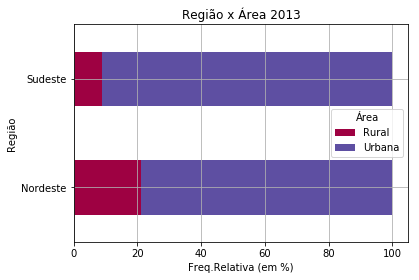

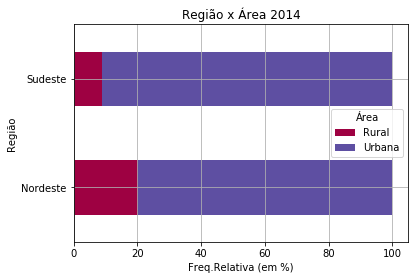

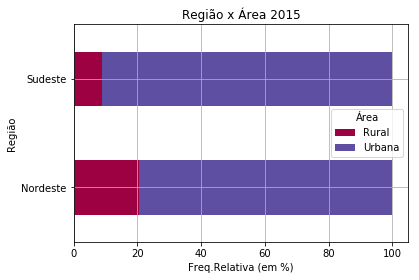

In [769]:
plot = yt.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="Spectral")
plt.xlabel('Freq.Relativa (em %)')
plt.title("Região x Área 2013")
plt.grid(True)


plot = xt.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="Spectral")
plt.xlabel('Freq.Relativa (em %)')
plt.title("Região x Área 2014")
plt.grid(True)


plot = ct.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="Spectral")
plt.xlabel('Freq.Relativa (em %)')
plt.title("Região x Área 2015")
plt.grid(True)


Claramente a região Nordeste possui cerca de **2.5x a porcentagem da população rural da sudeste**, proporcionalmente. Não houveram mudanças significativas ao longo dos anos.

O gráfico a seguir cruza TV Colorida com as Regiões:

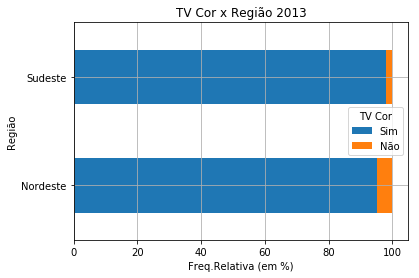

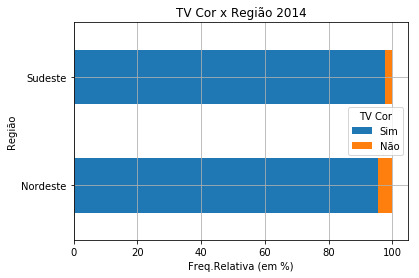

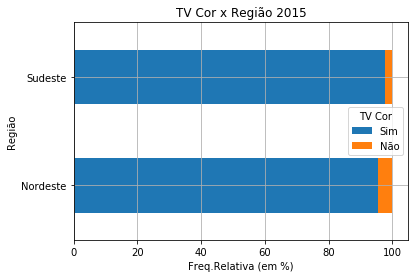

In [770]:
plot = yt1.iloc[0:2,0:2].plot(kind='barh',stacked=True)
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Cor x Região 2013")
plt.grid(True)


plot = xt1.iloc[0:2,0:2].plot(kind='barh',stacked=True)
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Cor x Região 2014")
plt.grid(True)


plot = ct1.iloc[0:2,0:2].plot(kind='barh',stacked=True)
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Cor x Região 2015")
plt.grid(True)


Como esperado a TV Colorizada é predominante nas duas regiões, porém novamente a região Nordeste tem cerca de **3x mais a porcentagem de domicílios sem esse aparato**, proporcionalmente. Também não houveram grandes mudanças ao longo dos anos.

O gráfico a seguir cruza TV Assinada com as Regiões:

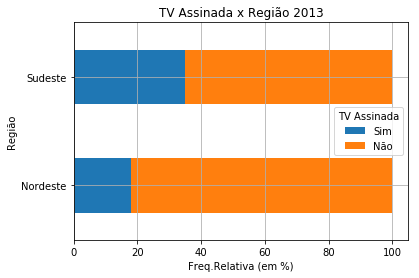

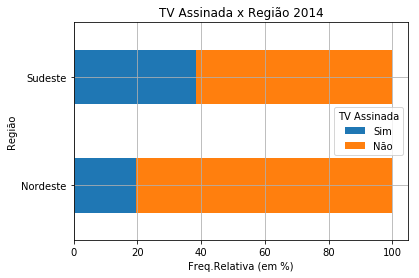

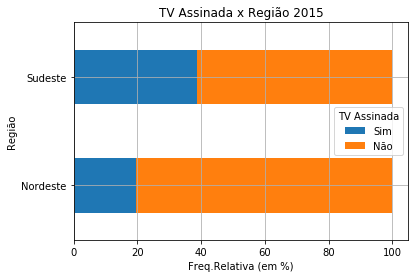

In [771]:
plot = yt2.iloc[0:2,0:2].plot(kind='barh',stacked=True)
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Assinada x Região 2013")
plt.grid(True)


plot = xt2.iloc[0:2,0:2].plot(kind='barh',stacked=True)
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Assinada x Região 2014")
plt.grid(True)


plot = ct2.iloc[0:2,0:2].plot(kind='barh',stacked=True)
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Assinada x Região 2015")
plt.grid(True)


A região Nordeste possui cerca de **20% mais domícilios sem TV Assinada**, proporcionalmente; Sem grandes alteraões ao longo dos anos.


O gráfico a seguir cruza TV Digital com as Regiões:

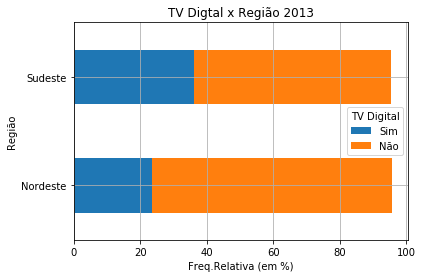

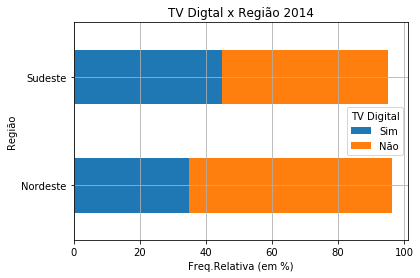

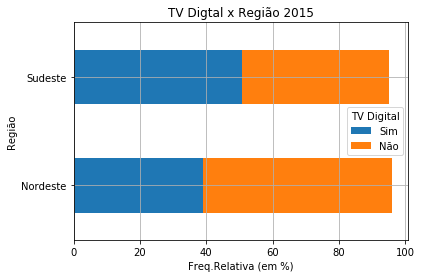

In [772]:
plot = yt3.iloc[0:2,0:2].plot(kind='barh',stacked=True)
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Digtal x Região 2013")
plt.grid(True)


plot = xt3.iloc[0:2,0:2].plot(kind='barh',stacked=True)
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Digtal x Região 2014")
plt.grid(True)


plot = ct3.iloc[0:2,0:2].plot(kind='barh',stacked=True)
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Digtal x Região 2015")
plt.grid(True)


Impressionantemente, houve um crescimento enorme de cerca de **150% do numéro de domicílios com TV Digital entre os anos 2013-2015 no Sudeste e cerca de 180% no Nordeste**, com a região Sudeste até passando da marca de 50% de seus domicílios. Mesmo assim, essa região ainda mantém cerca de 33% a mais de domícilios com TV Digital.

O gráfico a seguir cruza TV Parabólica com as Regiões:

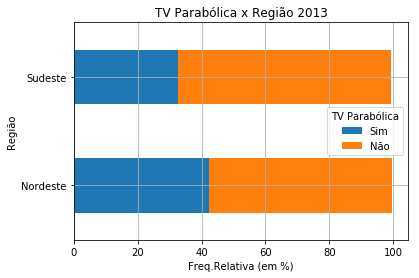

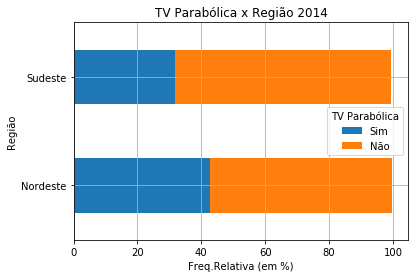

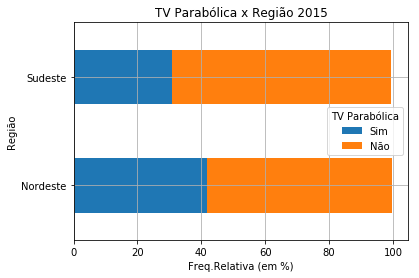

In [773]:
plot = yt4.iloc[0:2,0:2].plot(kind='barh',stacked=True)
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Parabólica x Região 2013")
plt.grid(True)


plot = xt4.iloc[0:2,0:2].plot(kind='barh',stacked=True)
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Parabólica x Região 2014")
plt.grid(True)


plot = ct4.iloc[0:2,0:2].plot(kind='barh',stacked=True)
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Parabólica x Região 2015")
plt.grid(True)


Nota-se que os domicílios do Nordeste ainda possuem **10% a mais de TVs parabólicas** proporcionalmente ao seu total. Além disso, mesmo com o grande crescimento da TV Digital, não houve decréscimo do número das parabólicas.

___
## Gráficos Cruzados por Área do Nordeste

Após essa revisão por região, é razoável concluir que **a região Nordeste tem maior potencial de crescimento**, devido a uma maior falta acesso do serviço de TV, em conjunto com uma disposição para comprar, evidenciado pelo crescimento da TV Digital maior até que o da região Sudeste. Portanto analisaremos as suas áreas para determinar o quão impactadas foram pelas mudanças descobertas acima.

O gráfico a seguir mostra a distribuição Urbano/Rural do Nordeste entre 2013-2015:

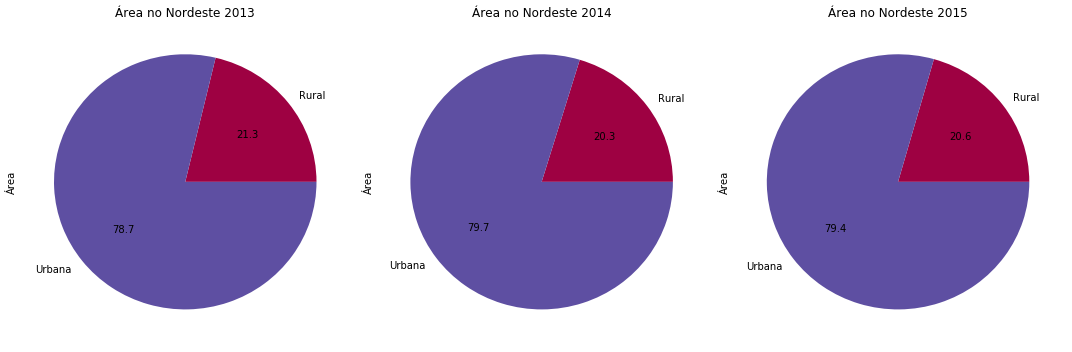

In [774]:
gt1 = dados2013.Área[(dados2013.Região=="Nordeste")].value_counts(sort=False) 
gt2 = dados2014.Área[(dados2014.Região=="Nordeste")].value_counts(sort=False) 
gt3 = dados2015.Área[(dados2015.Região=="Nordeste")].value_counts(sort=False) 

fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = gt1.plot(kind='pie',title='Área no Nordeste 2013',autopct='%.1f',colormap="Spectral")

plt.subplot(132)
plot = gt2.plot(kind='pie',title='Área no Nordeste 2014',autopct='%.1f',colormap="Spectral")

plt.subplot(133)
plot = gt3.plot(kind='pie',title='Área no Nordeste 2015',autopct='%.1f',colormap="Spectral")

plt.tight_layout()
plt.show()

Não houveram alterações na divisão entre urbano e rural no Nordeste entre 2013-2015. Além disso é claro que o **Nordeste possui uma maioria Urbana**.

O gráfico a seguir cruza TV Colorizada com Área: 

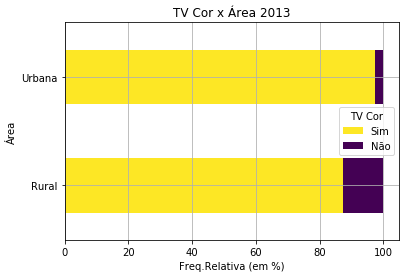

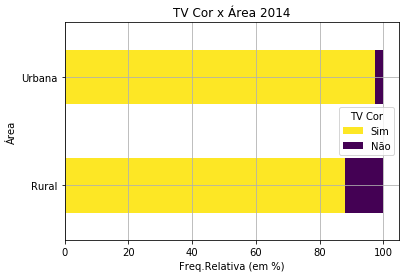

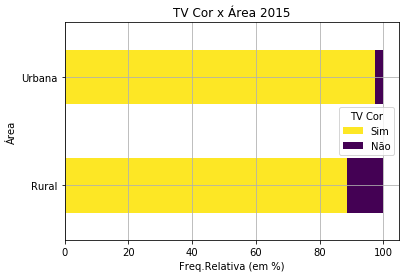

In [775]:
plot = dt1.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="viridis_r")
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Cor x Área 2013")
plt.grid(True)

plot = bt1.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="viridis_r")
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Cor x Área 2014")
plt.grid(True)

plot = at1.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="viridis_r")
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Cor x Área 2015")
plt.grid(True)

A zona Rural tem **10% a menos de domicílios com TV Colorizada** do que a Urbana, além disso não houveram mudanças grandes ao longo dos anos.

O gráfico a seguir cruza TV Assinada com Área:

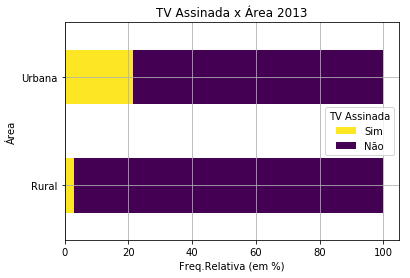

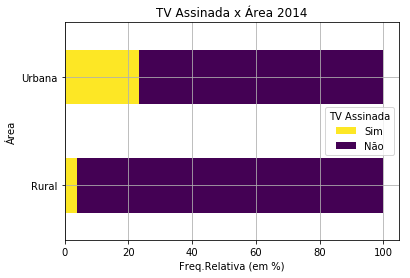

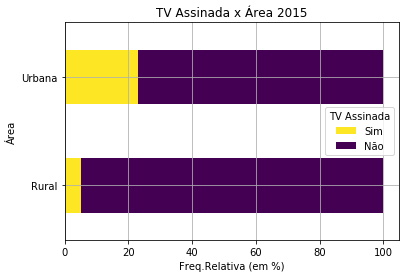

In [776]:
plot = dt2.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="viridis_r")
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Assinada x Área 2013")
plt.grid(True)

plot = bt2.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="viridis_r")
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Assinada x Área 2014")
plt.grid(True)

plot = at2.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="viridis_r")
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Assinada x Área 2015")
plt.grid(True)

A TV Assinada cresce **cerca de 1.7x na zona Rural**, ainda mantendo-se 4x menor, e ligeiramente na zona Urbana.

O gráfico a seguir cruza TV Digital com Área:

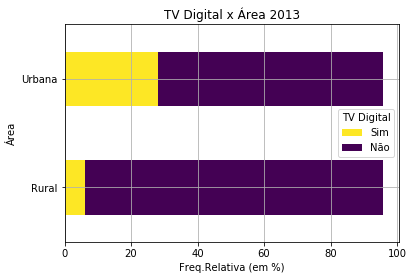

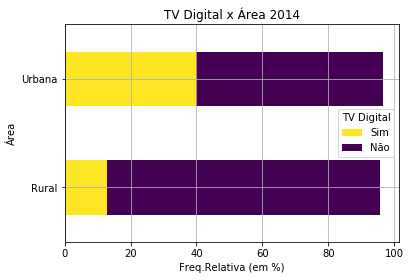

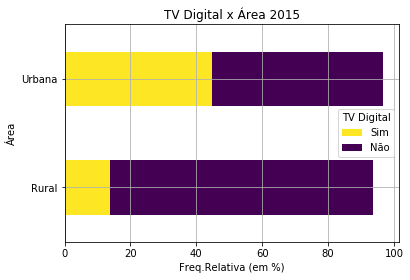

In [777]:
plot = dt3.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="viridis_r")
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Digital x Área 2013")
plt.grid(True)

plot = bt3.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="viridis_r")
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Digital x Área 2014")
plt.grid(True)

plot = at3.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="viridis_r")
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Digital x Área 2015")
plt.grid(True)

Surpreendentemente, a TV Digital **cresceu mais na zona Rural do que na Urbana**, proporcionalmente, cerca de 210% comparado a 150%.

O gráfico a seguir cruza TV Parabólica com Área:

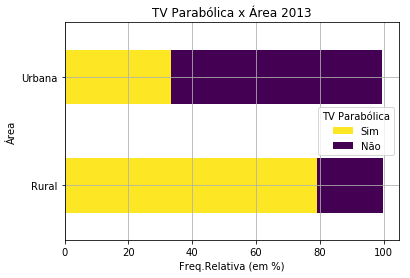

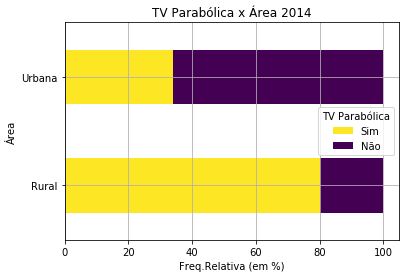

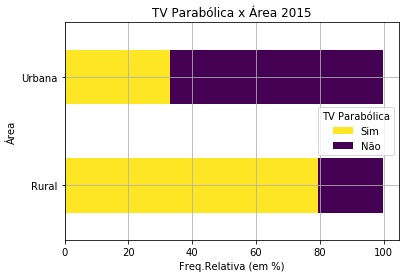

In [778]:
plot = dt4.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="viridis_r")
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Parabólica x Área 2013")
plt.grid(True)

plot = bt4.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="viridis_r")
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Parabólica x Área 2014")
plt.grid(True)

plot = at4.iloc[0:2,0:2].plot(kind='barh',stacked=True,colormap="viridis_r")
plt.xlabel('Freq.Relativa (em %)')
plt.title("TV Parabólica x Área 2015")
plt.grid(True)

Não houve muita alteração durante os anos, porém é importante notar que a zona **Rural tem 50% a mais de domicílios com TV Parabólica** do que a zona Urbana.

O gráfico a seguir representa a Renda do Nordeste no período de 2013-2015:

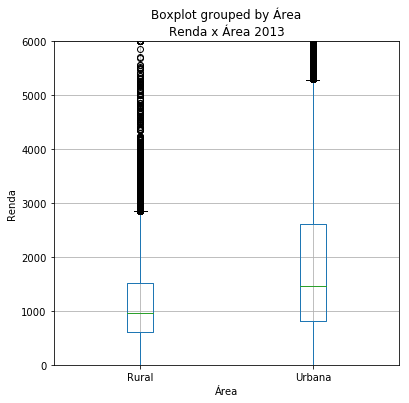

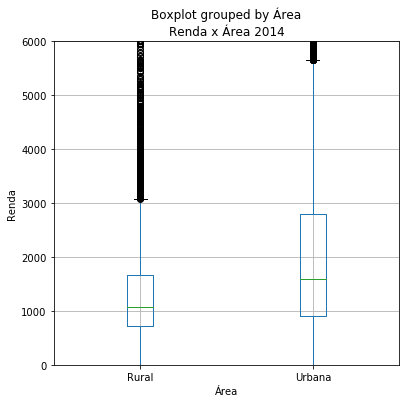

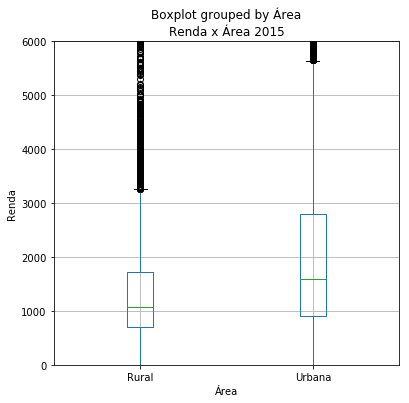

In [807]:
plot = dados2013[(dados2013.Região=="Nordeste")].boxplot('Renda',by='Área',figsize=(6,6))
plt.ylabel('Renda')
plt.xlabel('Área')
plt.title("Renda x Área 2013")
plt.ylim(0,6000)
plt.show()

plot = dados2014[(dados2014.Região=="Nordeste")].boxplot('Renda',by='Área',figsize=(6,6))
plt.ylabel('Renda')
plt.xlabel('Área')
plt.title("Renda x Área 2014")
plt.ylim(0,6000)
plt.show()

plot = dados2015[(dados2015.Região=="Nordeste")].boxplot('Renda',by='Área',figsize=(6,6))
plt.ylabel('Renda')
plt.xlabel('Área')
plt.title("Renda x Área 2015")
plt.ylim(0,6000)
plt.show()

Deduz-se que os domícilios do Nordeste urbanos têm em média **400,00 reais a mais de renda do que os da zona rural**. Além disso, domicílios com mais de 5.500,00 reais (na área urbana) e 3.200,00 reais (na área rural) de renda **não represantam o Nordeste efetivamente**. Houve um pequeno crescimento da média e da renda para a maioria em 3 anos, o que pode indicar uma tendência a crescer.

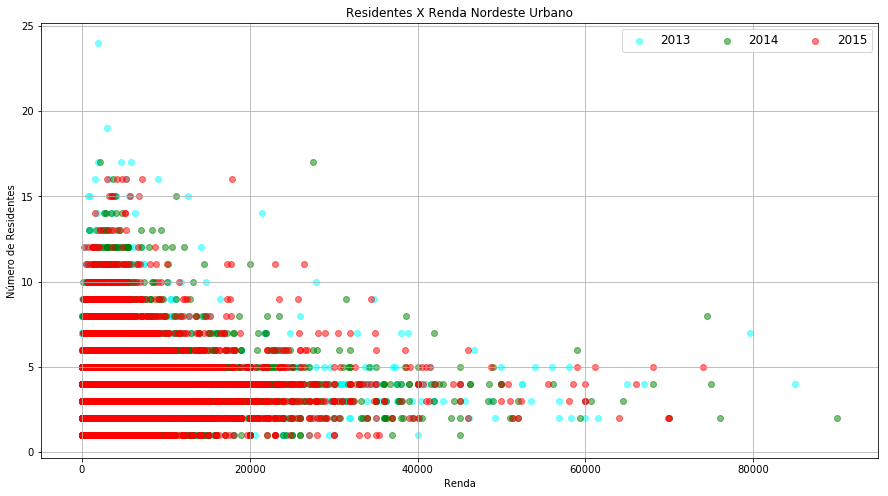

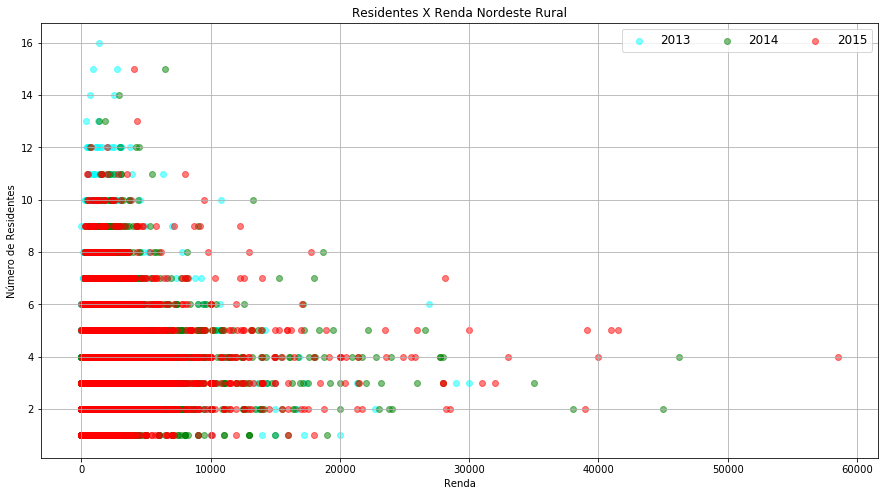

In [809]:
fig = plt.figure(figsize=(15,8))
plt.grid(True)
todos1 = plt.scatter(x=dados2013.Renda[(dados2013.Região=="Nordeste") & (dados2013.Renda<=100000) & (dados2013.Área=="Urbana")],y=dados2013.Residentes[(dados2013.Região=="Nordeste")& (dados2013.Renda<=100000) & (dados2013.Área=="Urbana")],c="cyan",alpha=0.5)
todos2 = plt.scatter(x=dados2014.Renda[(dados2014.Região=="Nordeste") & (dados2014.Renda<=100000) & (dados2014.Área=="Urbana")],y=dados2014.Residentes[(dados2014.Região=="Nordeste")& (dados2014.Renda<=100000) & (dados2014.Área=="Urbana")],c="green",alpha=0.5)
todos3 = plt.scatter(x=dados2015.Renda[(dados2015.Região=="Nordeste") & (dados2015.Renda<=100000) & (dados2015.Área=="Urbana")],y=dados2015.Residentes[(dados2015.Região=="Nordeste")& (dados2015.Renda<=100000) & (dados2015.Área=="Urbana")],c="red",alpha=0.5)
plt.ylabel('Número de Residentes')
plt.xlabel('Renda')
plt.title("Residentes X Renda Nordeste Urbano")
plt.legend((todos1, todos2, todos3),
           ('2013', '2014', "2015"),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=12)
plt.show()

fig = plt.figure(figsize=(15,8))
plt.grid(True)
todos1 = plt.scatter(x=dados2013.Renda[(dados2013.Região=="Nordeste")& (dados2013.Renda<=100000) & (dados2013.Área=="Rural")],y=dados2013.Residentes[(dados2013.Região=="Nordeste")& (dados2013.Renda<=100000) & (dados2013.Área=="Rural")],c="cyan",alpha=0.5)
todos2 = plt.scatter(x=dados2014.Renda[(dados2014.Região=="Nordeste")& (dados2014.Renda<=100000) & (dados2013.Área=="Rural")],y=dados2014.Residentes[(dados2014.Região=="Nordeste")& (dados2014.Renda<=100000) & (dados2013.Área=="Rural")],c="green",alpha=0.5)
todos3 = plt.scatter(x=dados2015.Renda[(dados2015.Região=="Nordeste")& (dados2015.Renda<=100000) & (dados2013.Área=="Rural")],y=dados2015.Residentes[(dados2015.Região=="Nordeste")& (dados2015.Renda<=100000) & (dados2013.Área=="Rural")],c="red",alpha=0.5)
plt.ylabel('Número de Residentes')
plt.xlabel('Renda')
plt.title("Residentes X Renda Nordeste Rural")
plt.legend((todos1, todos2, todos3),
           ('2013', '2014', "2015"),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=12)
plt.show()

Percebe-se que há uma tendência de a **renda ser menor quanto maior o número de residentes** nas duas zonas. Além disso, a zona rural chega com frequência até somente cerca de 25.000,00 reais, enquanto a **zona urbana chega com frequência até cerca de 55.000,00 reais**.

___
## Conclusão 

O objetivo desta pesquisa era primeiramente definir qual região tem maior potencial de crescimento de seu acesso a TV. A partir da ánalise inicial, nota-se que a região Sudeste tem 15.6% a mais de domicílios em 2015 e que a área urbana é predominante, sendo ocupada por 86.2% de todos esses lares. Após os dados serem cruzados, o que ressaltou foram os resultados de **TV Assinada x Região, TV Digital x Região e TV Parabólica x Região**. 

A respeito da TV Assinada o que pode ser deduzido é que o Nordeste tem 20% a menos de domicílios com esse serviço, o que significa que **esse mercado ainda não foi muito explorado na região, ao contrário do Sudeste que já pode ser considerado mais saturado nesse sentido**. Em relação a TV Digital, impressionantemente, o Nordeste conseguiu ter um crescimento maior do accesso a esse tipo de aparelho, uma vez que cresceu 30% mais que o Sudeste em 3 anos, portanto é razoável afirmar que **o Nordeste tem capacidade de crescer e ainda está em fase de desenvolvimento**. Por outro lado, o gráfico da TV Parabólica indica que o a região nordestina possui 10% a mais de locais com esse aparato obsoleto em 2015, assim fica evidente que **estes domicílios ainda podem migrar para a TV Digital** (o que é um passo natural, levando em conta que o sinal analógico está sendo desligado em diversas partes do país atualmente), ou seja, **tem mais potencial de crescimento do acesso no longo prazo**. Levando em conta todos esses fatores fica claro que **o Nordeste possui mais potencial para crescer**.

fonte:http://g1.globo.com/tecnologia/noticia/tv-digital-veja-cronograma-de-desligamento-do-sinal-analogico-nas-cidades.ghtml

Em seguida foi necessário determinar qual das áreas do Nordeste possui esse potencial. Para analisar as zonas Urbana e Rural do Nordeste foram gerados mais gráficos com as variáveis da pesquisa; os que produziram resultados mais relevantes foram os de **TV Digital x Área, Boxplot de Renda x Área e os Scatterplots de Número de Residentes x Renda**.

A partir do gráfico de TV Digital, é notada um crescimento de 150% para o acesso deste nos domicílios urbanos, enquanto a área Rural teve um crescimento de 210%, porém **o valor inicial de é tão pequeno que mesmo com um crescimento desse a porcentagem de "Sim"s não passou de 20%**. O boxplot de renda revela que a **renda média da área urbana é maior em 400,00 reais** comparado ao rural. Além disso, a faixa de renda da maioria dos domicílios urbanos chega até a cerca de 5.500,00 reais,** mais de 2.000,00 reais a mais que a faixa rural**, assim é possível dizer que os lares urbano tem, em média, maior poder de compra que os rurais. Finalmente, os scatterplots de Residentes x Renda demonstram que quanto **maior for a renda menor o número de residentes**, em média, e ao analisá-los percebe-se que, mesmo nas residências com menos indivíduos, as rurais chegam no máximo em 25.000,00 reais com frequência, enquanto **as urbanas chegam frequentemente em 55.000,00 reais**, o que fortalece o argumento que o poder de compra da zona urbana é significativamente maior.

Portanto, apesar de ter maior porcentagem de lares com TVs Parabólicas e ter um crescimento de TVs Digitais maior proporcionalmente, fica evidente que **a área rural não conseguiria suportar um crescimento maior de acesso a TV que o da área urbana devido as suas limitações econômicas**, e talvez até geográficas (uma vez que é mais difícil de se ter sinal e cabos de TV no interior dos estados, além de representar uma porcentagem bem menor de domicílios na região). Assim, **a zona urbana do Nordeste é o local com maior potencial de crescimento do accesso a TV**, devido não só a sua situação financeira, como também ao seu crescimento favorável de variáveis importantes, característico de uma área em desenvolvimento.